#### Going Deeper(CV)_DJ2


# 13. 멀리 있지만 괜찮아



- 서버로 이미지를 보낸 후 처리하는 방식은 **네트워크 비용 + 서버 비용 + 인터넷 속도의 영향**을 고려

- 핸드폰에 모델을 올리려면 weight가 작은 모델이 관리에 유리.

### 얼굴 인식 알고리즘


#### 1. 얼굴 인식 과정

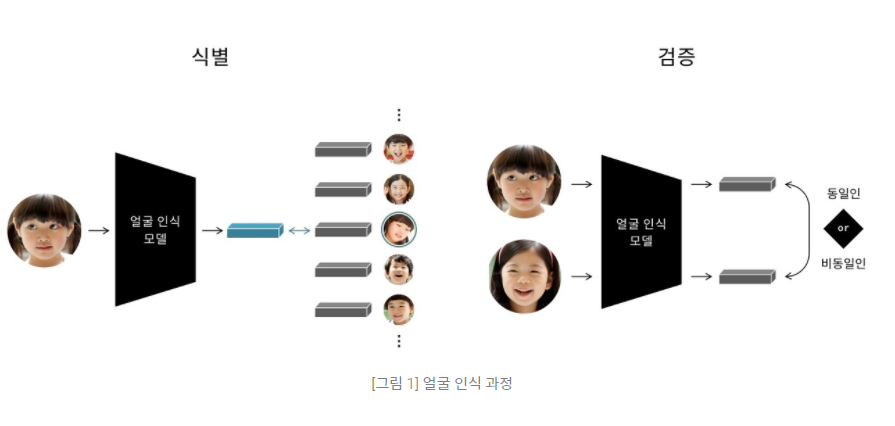

- 1) 시스템에 입력된 이미지에서 얼굴 영역을 찾아 (face detection, 얼굴 검출)
- 2) 눈과 코 등 얼굴의 특징을 나타내는 점을 찾는다(face alignment, 얼굴 정렬)
- 3) 이 특징점을 이용해 얼굴 영역을 동일한 형태와 크기로 변경(normalization, 정규화)

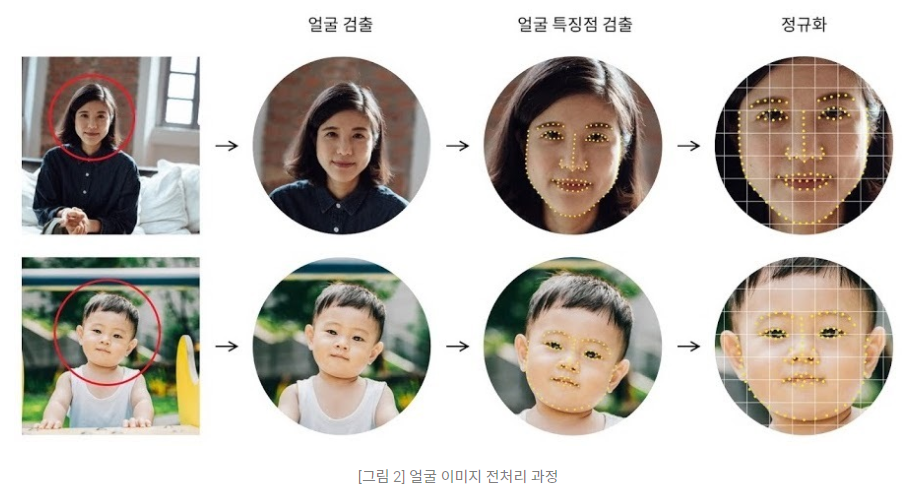

- 정규화된 얼굴 이미지로부터 인물을 잘 구분하는 함축된 얼굴표현(facial representation)인 특징 벡터(feature vector)를 학습합니다.
- 최종 얼굴 인식 모델은 입력된 이미지의 특징 벡터 간 유사도(similarity)를 비교하는 방식으로 검증 또는 식별


- GroupFace : https://tech.kakaoenterprise.com/70?category=909203


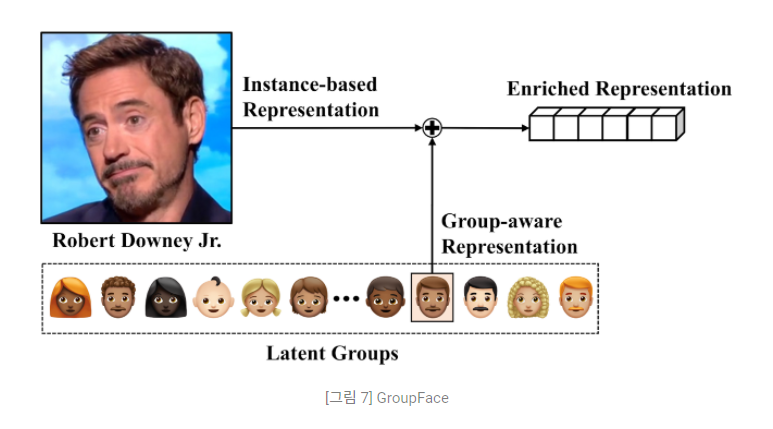



### 손실 함수 연구


> 1) 순전파(forward propagation) 과정에서 데이터를 입력 받은 모델은 무작위로 초기화된 가중치를 이용해 예측값을 출력

> 2) 예측값과 정답 사이의 차이를 정의하는 손실 함수를 이용해 입력에 대한 손실(loss)을 계산

> 3) 출력층에서 입력층으로 거슬러 올라가는 역전파(backward propagation)과정

> 4) 최적화 알고리즘은 기울기(gradient) 값을 이용해 앞서 구한 손실을 최소화하는 방향으로 모델의 가중치 값을 수정.


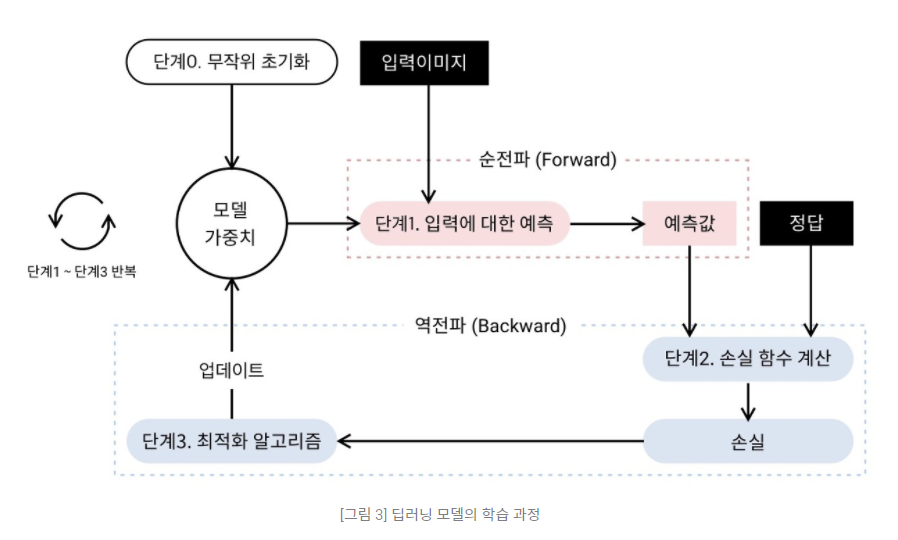

### 1.  소프트맥스 손실 함수

- 완전연결층(fully-connected layer)와 소프트맥스(softmax) 함수로 구성.
- 교차 엔트로피(cross entropy)가 소프트맥스 확률 분포와 정답 분포 사이 오차를 계산.



- 소프트맥스 손실 값을 최소화하는 학습을 통해 모델은 특징 공간(feature space)에 동일인의 두 특징 벡터(intra-class)를 더 가깝게, 비동일인의 두 특징 벡터(inter-class)는 더 멀게 표현할 수 있게 됩니다.

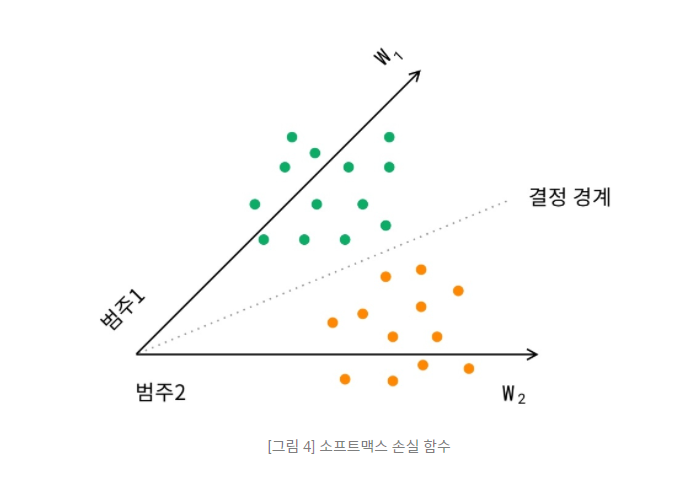

### 2. 거리 기반 손실 함수

- 특징 공간에 동일인의 두 특징 벡터를 더 가깝게, 비동일인의 두 특징 벡터는 더 멀게 표현하는 학습에 활용.

- 차이점은 특징 벡터 간의 거리를 학습에 직접 활용하는 부분.

> - 대비 손실 함수는 두 얼굴 이미지의 쌍을 구성해 두 특징 벡터 간의 거리를 계산합니다. 여기서 손실 값은 동일인의 두 벡터 간 거리가 멀면 커지고, 반대로 비동일인의 두 벡터간 거리가 가까우면 커집니다.
    - 이에 모델은 이 손실 값을 최소화하는 학습을 통해 동일인에 해당하는 두 벡터를 가깝게, 비동일인의 두 벡터를 더 멀게 표현할 수 있게 됨.
    
> - 트리플렛 손실 함수는 범주가 같은 벡터 간의 거리와 범주가 다른 벡터 간의 거리의 상대적 관계를 고려하는 방식으로 이 문제를 해결합니다. 먼저, 기준이 되는 이미지 a, 동일인 이미지 p, 그리고 비동일인 이미지 n으로 구성된 트리플렛(a, p, n)을 구성합니다. 트리플렛 손실 함수는 a와 p의 벡터 간 거리를 줄이는 동시에, a와 n의 벡터 간 거리를 넓힙니다. 즉, 두 거리의 차(|a-n| - |a-p|)가 개발자가 임의로 정한 마진값보다 크도록 합니다. 그 결과, 트리플렛 손실 함수로 학습된 인식 모델은 대비 손실 함수와 비교했을 때 더 높은 추론 성능을 보이는 경향이 있습니다.

출처: https://tech.kakaoenterprise.com/63 [카카오엔터프라이즈 기술블로그 Tech&(테크앤)]


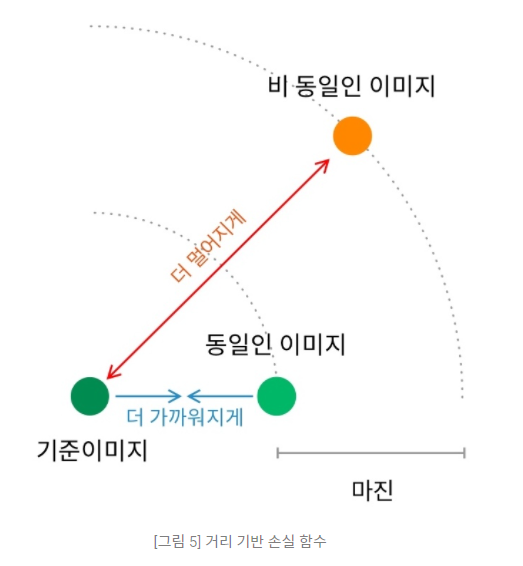



### 3. 앵귤러 마진 기반 손실 함수

- SphereFace에서 CosFace와 ArcFace로 이어지는 근래의 얼굴 인식 연구는 앵귤러 마진을 추가한 소프트맥스 기반 손실 함수를 이용해 서로 다른 인물 간 거리를 충분히 넓히는 방향으로 진행되고 있습니다. 

- 충분히 큰 한정된 공간이 있다고 가정해 보겠습니다. 학습 시 다른 범주를 1의 간격으로 분포하게 만들어도 분류는 완벽하게 이뤄집니다. 여기에 더 나아가, 다른 범주를 10의 간격으로 두고 데이터 분포를 훈련한다면 어떻게 될까요? 학습 난이도는 높을지라도 공간을 효율적으로 사용할 수 있어, 모델의 일반화(generalization)7 성능이 높다고 기대해볼 수 있겠습니다. 여기서는 이러한 간격을 특징 벡터 간의 각도에 적용하였다는 점에서 앵귤러 마진이라는 이름이 붙었습니다.


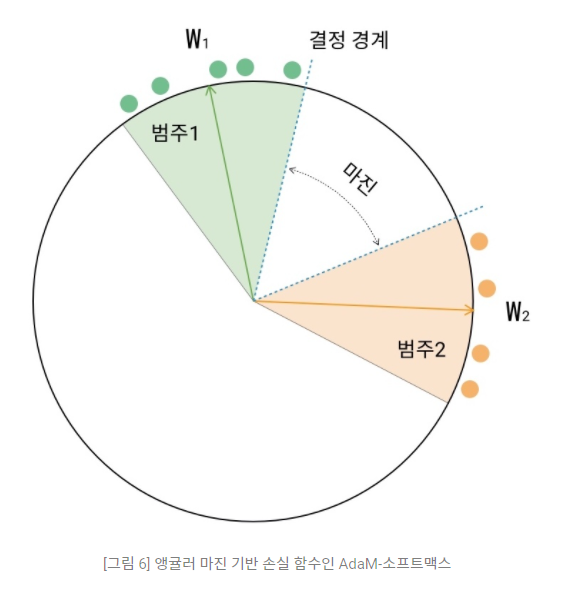

**********************************


- Face detection에서 많은 시간이 드는 요소는 Sliding window이다.

    - Sliding window를 버려야 빨라진다.
    - 연산의 병렬화가 가능해야 한다.
    
- 핸드폰의 병렬화는 훈련된 모델 이용 : https://www.tensorflow.org/lite?hl=ko


- 그 외의 방법은 병렬화 도구를 사용한다.
    - SIMD-병렬-프로그래밍 : https://stonzeteam.github.io/SIMD-%EB%B3%91%EB%A0%AC-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/
    
    - OpenCL : https://www.khronos.org/opencl/
    - Android:Open GL ES : https://developer.android.com/guide/topics/graphics/opengl?hl=ko
    
    
    
## 13-2. Single Stage Object Detection

- Fast Detection Models : https://lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html

- What do we learn from single shot object detectors, FPN & Focal loss? : https://jonathan-hui.medium.com/what-do-we-learn-from-single-shot-object-detectors-ssd-yolo-fpn-focal-loss-3888677c5f4d

- **윗글의 번역본** : https://murra.tistory.com/17


## 13-3. YOLO (1) YOLO v1의 등장


#### YOLO : You Only Look Once

https://www.youtube.com/watch?v=NM6lrxy0bxs



## 13-4. YOLO (2) YOLO v1의 원리

- YOLO 논문 : https://arxiv.org/pdf/1506.02640.pdf


***********************

### RCNN과 YOLO




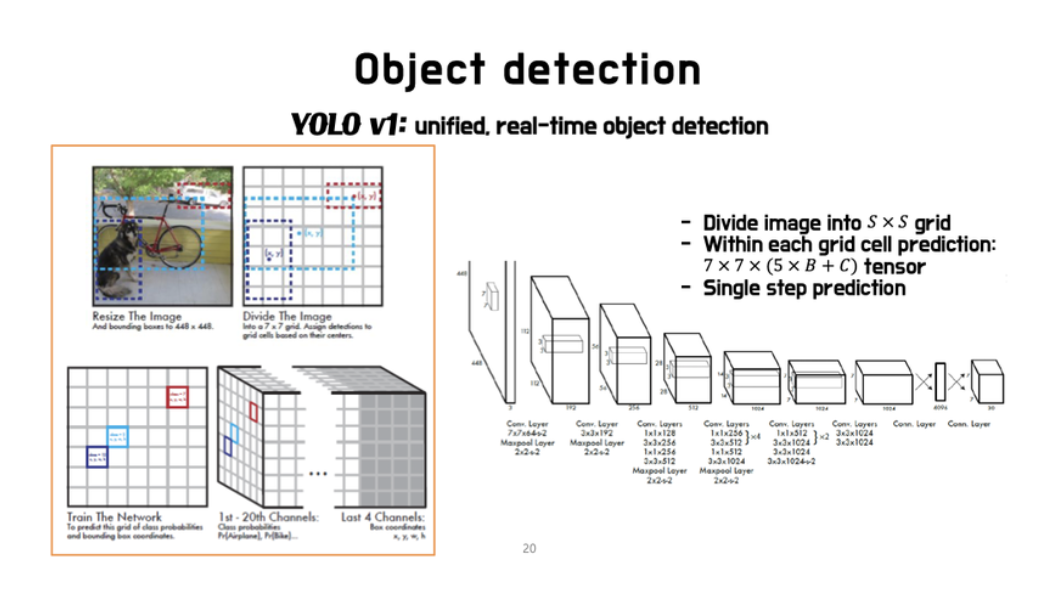

- RCNN과 YOLO 모델의 차이는 기본 가정부터 다르다.

> - RCNN 계열의 가정 :
"물체가 존재할 것 같은 곳을 backbone network로 표현할 수 있다." → region proposal network
> - YOLO v1의 가정 :
"이미지 내의 작은 영역을 나누면 그곳에 물체가 있을 수 있다." → grid 내에 물체가 존재한다.
    - 따라서 YOLO v1에서 grid는 고정되고, 각 grid 안에 물체가 있을 확률이 중요하게 됩니다.
    
    
### YOLO의 grid cell




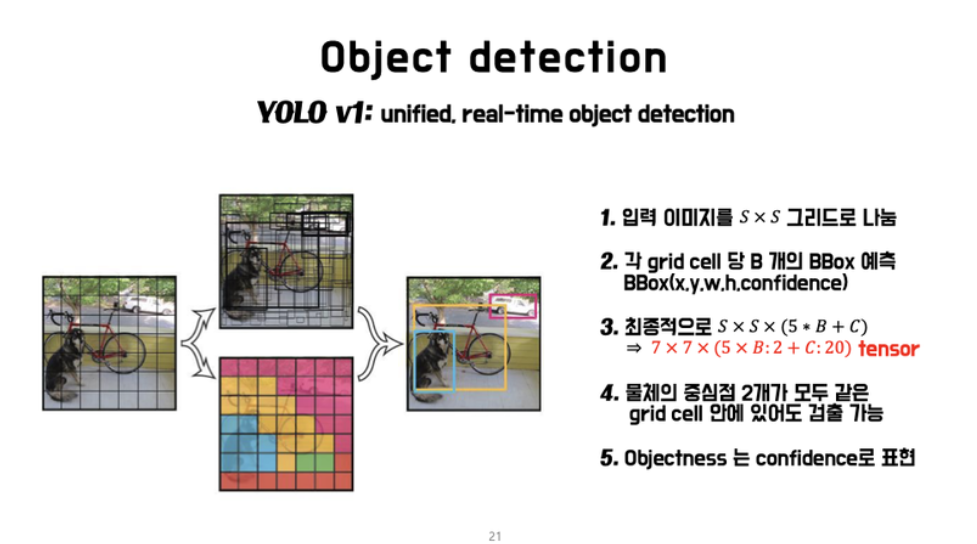

YOLO는 이미지를 S x S grid로 나누고, 각 grid cell은 bounding box(bbox)와 각 box의 confidence score를 예측합니다. 여기서 confidence score는 bbox가 사물(object)을 포함하는지를 모델이 얼마나 확신하는지(confident), 그리고 box가 그 사물을 얼마나 정확히 예측하는지를 보여주는 점수입니다. 각 bbox는 x, y, w, h, confidence, 총 5개의 예측을 하는데, (x, y) 좌표는 bbox의 중심 좌표이고 w와 h는 너비와 높이입니다.

각 grid cell은 C개의 조건부 class 확률 $$P(Class_i|Object)$$도 예측합니다. 이 확률은 grid cell이 사물을 포함할 때를 조건으로 하는 확률입니다. bounding box의 개수와 상관 없이 각 grid cell의 확률만 예측합니다.

따라서 YOLO의 예측값은 S x S x (B * 5 + C) 크기의 텐서로 출력됩니다.


> - Q3. 1개의 7x7 grid 당 2개의 bounidng box(BBox) 와 20개 클래스를 예측하는 YOLO 를 만들고 싶은 경우, output tensor의 크기와 이를 flatten했을 때의 크기는 무엇인가요?
    - output tensor의 크기는 7 x 7 x (5 x 2 + 20)이며, 이를 flatten하면 1470이다.

### Non-Maximum Suppression(NMS)란?


- object detectior가 예측한 bounding box 중에서 정확한 bounding box를 선택하도록 하는 기법이다.



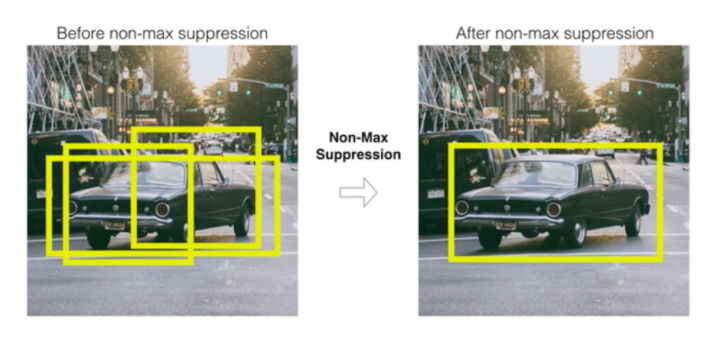

#### 알고리즘
> Detected 된 bounding box 별로 Confidence threshold 이하의 bounding box는 제거한다.
>>가장 높은 confidence score를 가진 box 순으로 내림차순 정렬하고 아래 로직을 모든 box에 순차적으로 적용
>>>가장 높은 confience score를 가진 box와 곂치는 다른 box를 모두 조사하여 IOU가 특정 threshold 이상인 box를 모두 제거. 
>>>>즉 IOU(아래 설명)가 일정 이상인 boundingbox는 동일한 물체를 detect 했다고 판단하고 곂치는 box를 제거해 주는 과정
>>>>>남아 있는 box만 선택한다.


참고 : https://naknaklee.github.io/etc/2021/03/08/NMS/

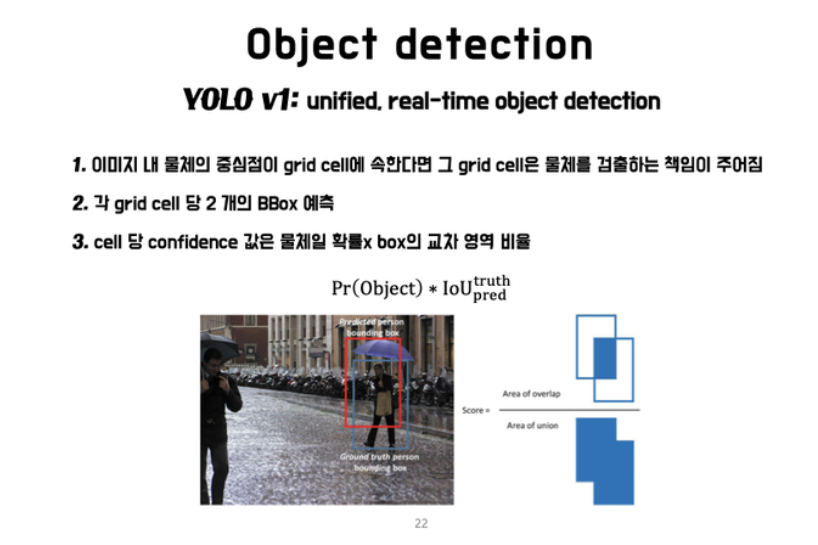

- YOLO의 목표는 grid에 포함되는 물체를 잘 잡아내는 것입니다. 즉 grid cell에 속하는 물체를 검출할 책임이 있는 거죠. 따라서 1개 grid에 귀속된 bbox 정보 (x, y, w, h)의 학습 목표는 bbox의 ground truth와 최대한 동일하도록 학습되는 것입니다. 학습 목표가 제대로 이루어졌는지를 확인하려면 객체 인식 모델의 성능 평가 도구인 IoU(Intersection over Union)를 사용


IoU 설명 : https://ballentain.tistory.com/12


### YOLO의 특징

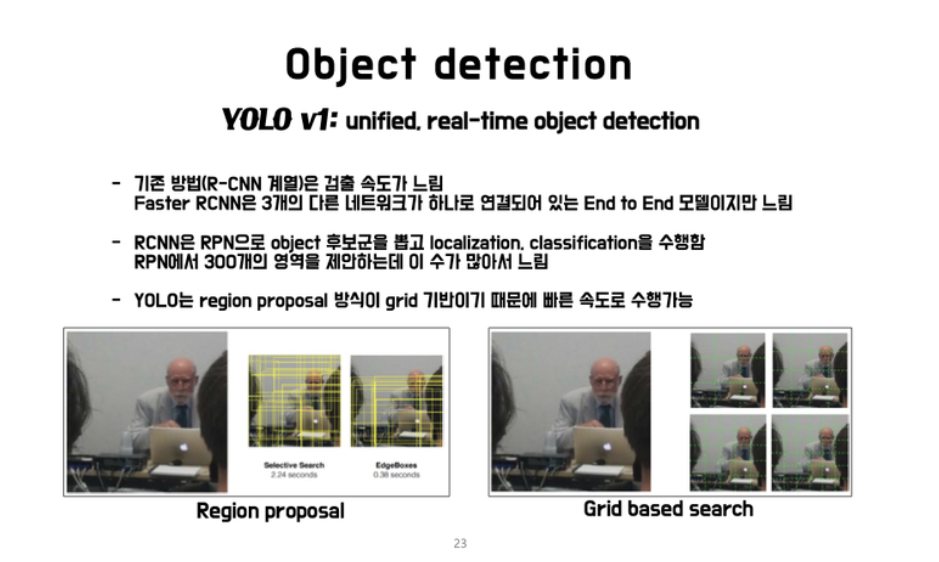

- object detection에서 기존에 사용되면 R-CNN 계열 방법은 검출속도가 느렸습니다. 그 중 빠르다고 여겨지던 Faster R-CNN도 YOLO보다는 속도가 느립니다. Faster R-CNN은 RPN(Region Proposal Network) 후보군을 뽑고 localization와 classification을 수행합니다. 이때 RPN에서 300개 영역을 제안하는데, objectness의 숫자가 많을수록 느려졌죠.

- 반면 YOLO는 이미지를 S x S개의 grid로 나누고, 한 개의 grid당 bbox의 좌표와 confidence score만 예측하므로 R-CNN 계열 방법보다 훨씬 빠른 속도를 보여줍니다. 그런 이유로 YOLO는 최초의 real-time object detector로 여겨집니다.


### YOLO의 Inference 과정

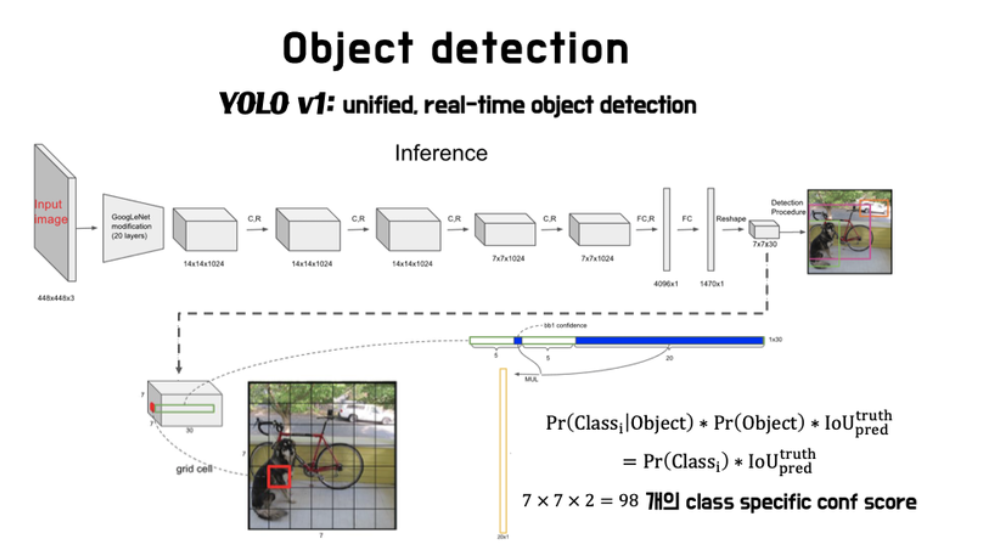

> 조건부 class 확률 $$P(Class_i|Object)$$는 마지막 layer에서 사용됩니다.

> output tensor의 크기 7 x 7 x 30에서 7 x 7은 49개의 grid cell이고, 30은 5(x, y, w, h, confidence score) * 2 + 20(조건부 class 확률의 개수)입니다. 위의 그림에서 빨간색 정사각형이 7 x 7=49인 grid cell이고, 초록색 직사각형은 1 x 30의 크기를 가지죠. 여기서 30이 바로 위에서 언급한 30(5 *2 +20)입니다.

> 테스트할 때, 조건부 확률 $$P(Class_i|Object)$$를 각 box의 confidence prediction과 곱해 class-specific confidence score를 얻을 수 있습니다. 각 score는 box 안에 나타나는 클래스의 확률과 예측된 box가 사물에 얼마나 잘 맞는지(fit)를 보여줍니다.

> $$P(class | object) * P(object) * IoU$$

> 각각의 bounding box의 confidence score와 각각의 조건부 class 확률을 곱하면 각 bounding box마다 class-specific confidence score를 얻을 수 있고, 그 개수는 7 * 7 * 2 = 98개입니다. 이 98개의 class-specific confidence score에 대해 20개의 class를 기준으로 NMS를 하여 object에 대한 class와 bounding box location을 결정할 수 있습니다.


참고 : https://docs.google.com/presentation/d/1aeRvtKG21KHdD5lg6Hgyhx5rPq_ZOsGjG5rJ1HP7BbA/pub?start=false&loop=false&delayms=3000&slide=id.g137784ab86_4_427

## 13-5. YOLO (3) YOLO v1의 성능


#### YOLO v1의 loss 함수

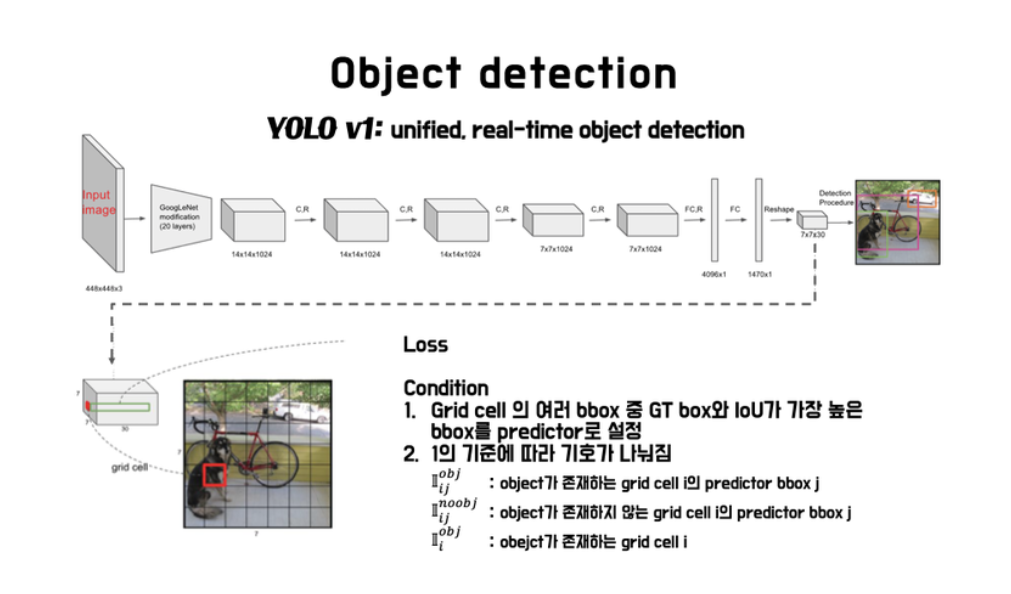

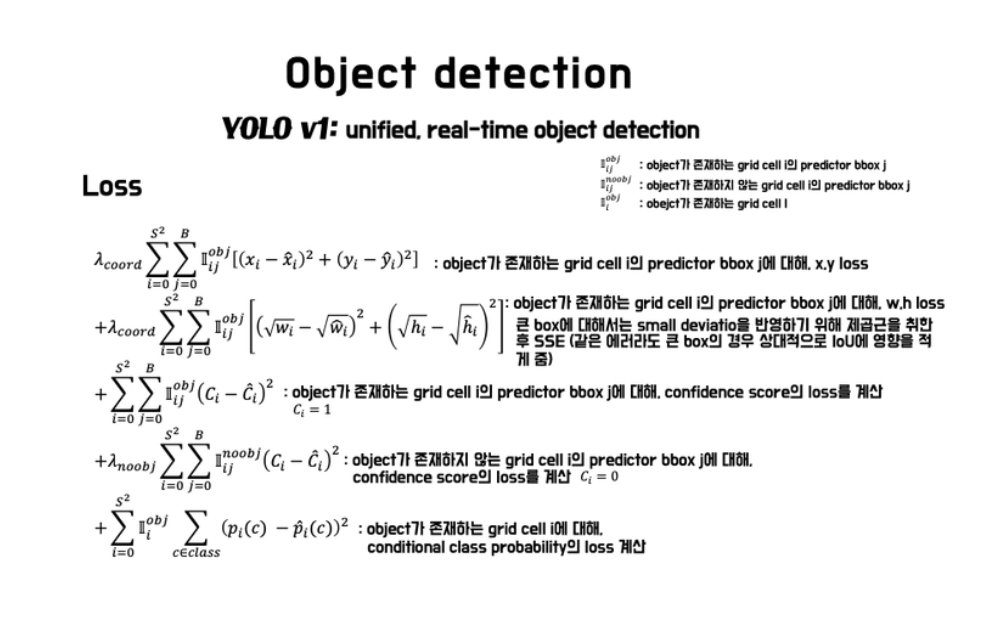

***********************************
### YOLO의 성능

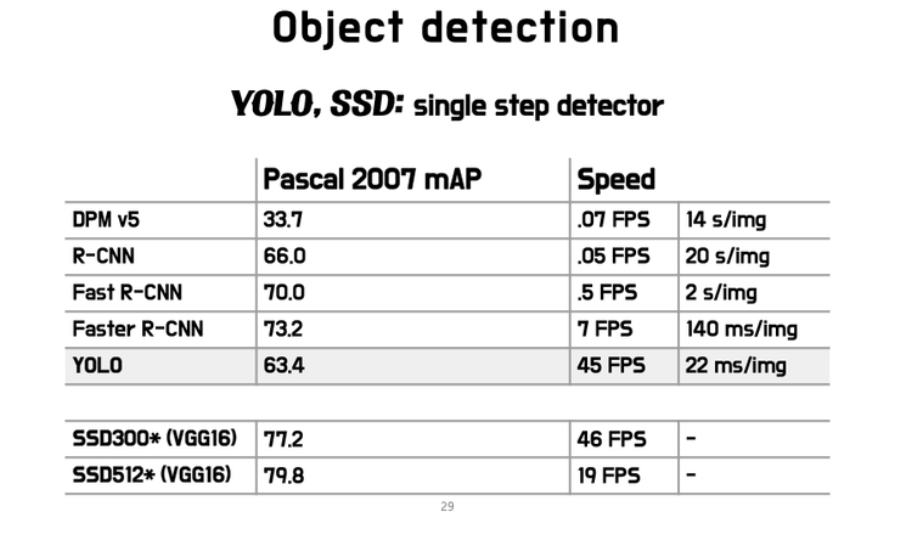

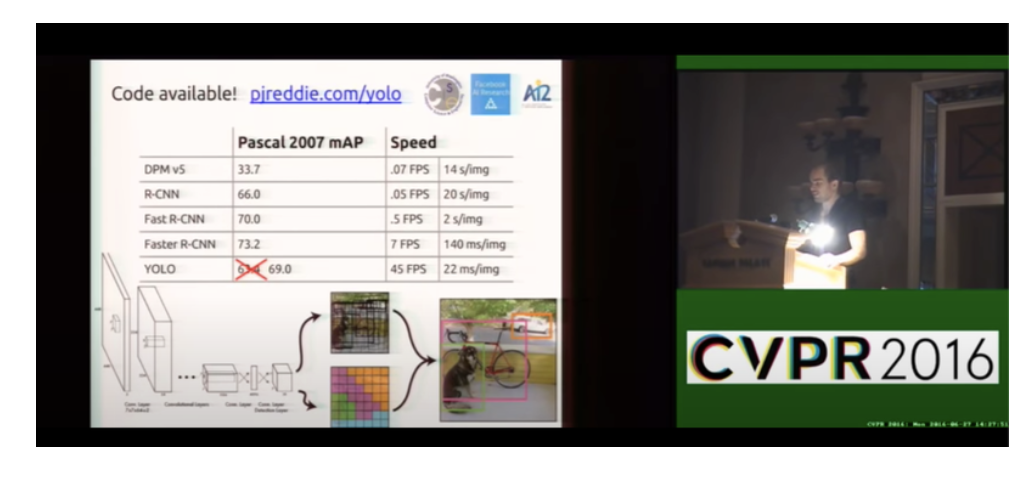

- arXiv 논문 발표에서는 mAP가 63.4였지만 CVPR 2016 발표때는 69.0으로 모델의 성능을 향상되어 발표되었습니다. 즉 YOLO v1은 Faster R-CNN과 성능에 큰 차이가 나지 않으면서 속도는 6배 이상인 혁신적인 연구였습니다.


******************************


### YOLO v1의 단점

- 각각 grid cell이 하나의 클래스만 예측 가능하므로 작은 object에 대해 예측이 어려웠습니다. 
- bbox의 형태가 training data를 통해 학습되었기 때문에 bbox 분산이 너무 넓어 새로운 형태의 bbox 예측이 잘 안되기도 했죠. 
- 또한 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부정확했습니다.


******************************

# 13-6. YOLO (4) YOLO v2




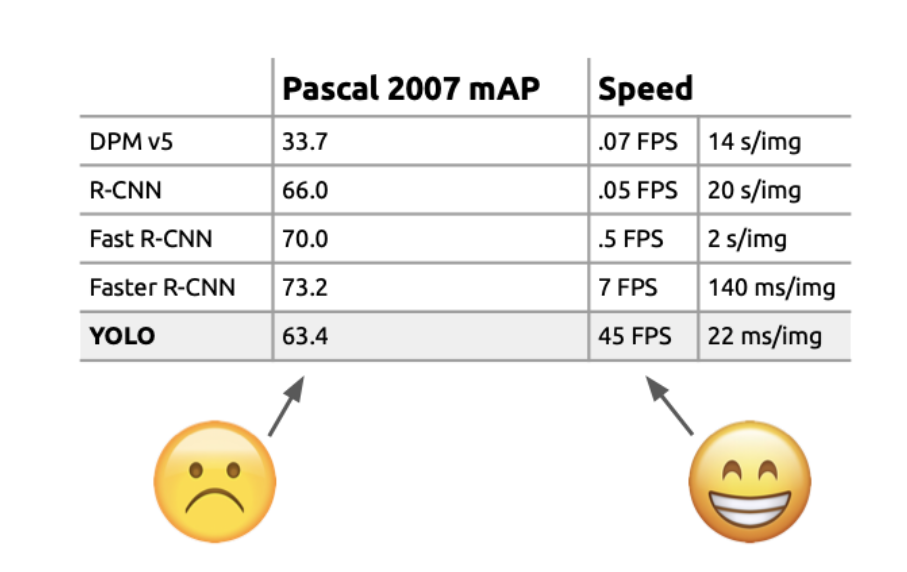

## YOLO v2의 목적
****************************************

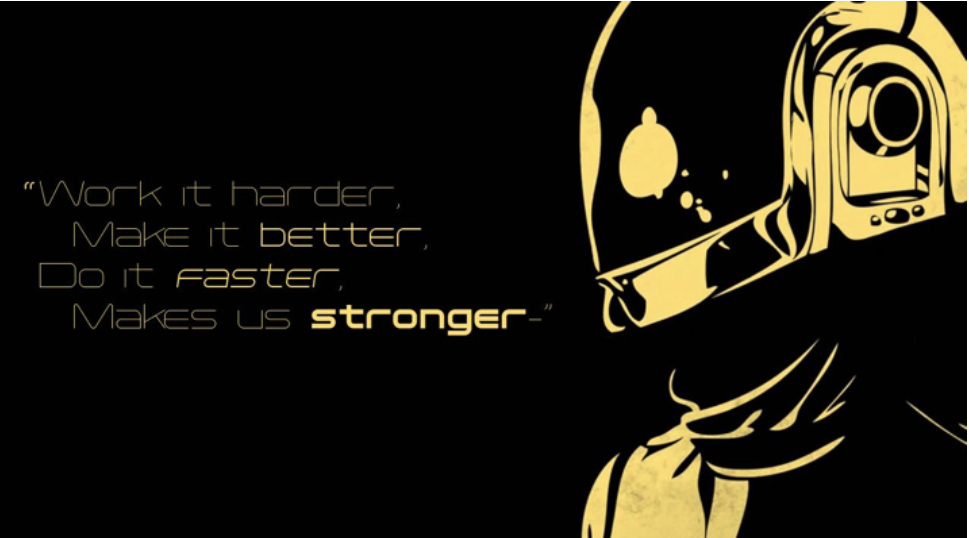

- Make it better
- Do it faster
- Makes us stronger

### Make it better

- Better는 정확도를 올리기 위한 방법이었습니다. 이를 위해 Batch Normalization, High Resolution Classifier, Convolutional with Anchor boxes, Dimension Clusters, Direct location prediction, Fine-Grained Features, Multi-Scale Training를 사용

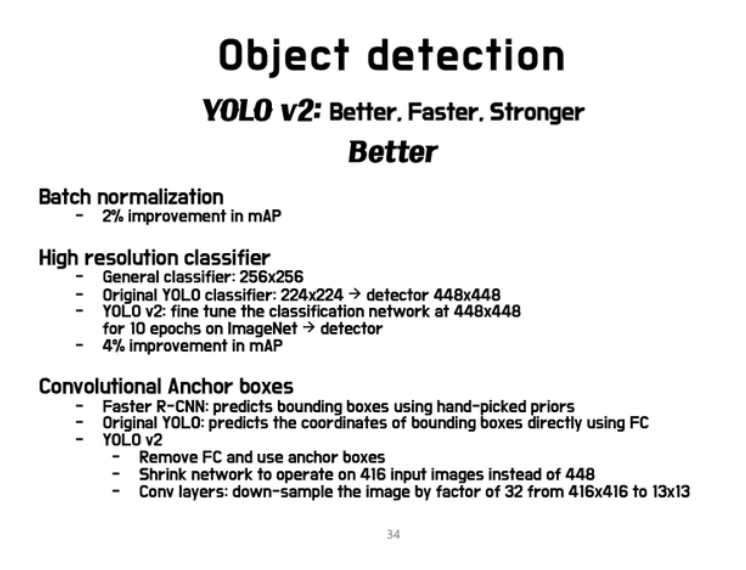

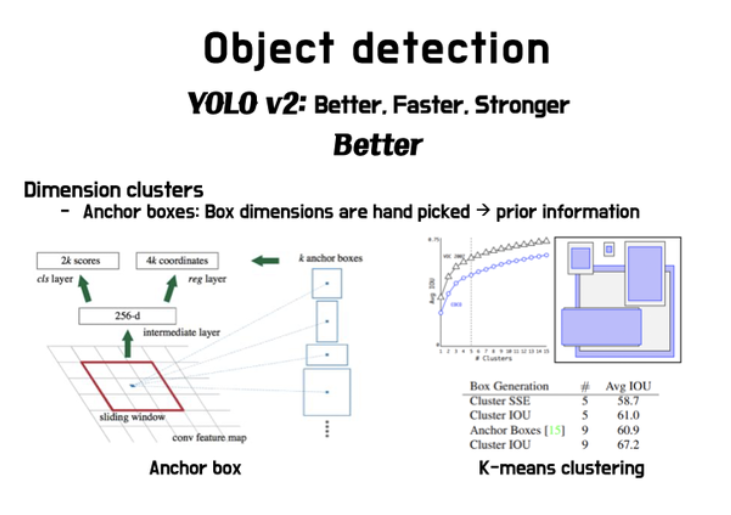

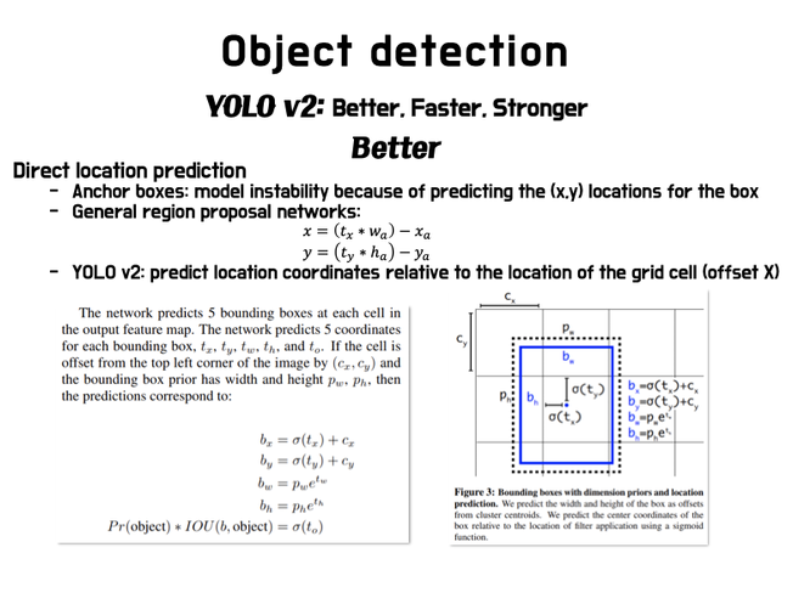

### Do it faster

- faster는 detection 속도를 향상시키기 위한 방법.
- Darknet-19, Training for classification, Training for detection를 사용

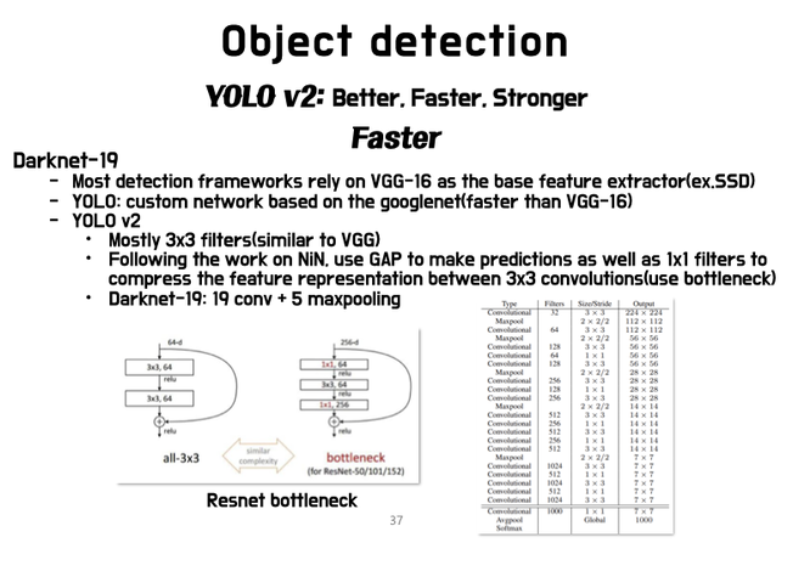

### Makes us stronger

- stronger는 더 많은 범위의 class를 예측하기 위한 방법
- Hierarchical classification, Dataset combination with WordTree, Joint classification and detection를 사용

- YOLO v2 논문 : https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

> - 9000개의 클래스를 구성하는 방법
    - https://dhhwang89.tistory.com/136
> 구현체는 Darknet

> - Introduction
    - Object Detection 데이터 셋들은 Classification 등의 데이터 셋과 비교하면 너무 제한적이다. 일반적으로 detection을 위한 dataset은 수십 ~ 수백개의 클래스를 포함한 수천~수십만개의 이미지를 포함하고 있는데, Classification을 위한 데이터셋은 수십만개의 클래스를 포함한 이미지가 수백만개가 있다.
    - YOLO 9000 논문의 핵심은 Classification 수준의 스케일을 detection을 해보고 싶은데 detection 데이터를 직접 레이블링 치기에는 너무 힘들고 하니 수 많은 Classification 데이터를 이용해서 현재 detection 시스템에 적용해보는 방법인 hierarchical view of object classification을 제안하고, 이를 학습시키는 joint training algorithm을 제안한다.

> - Better
    - recall이 낮다.

## YOLO v2의 성능 비교
**************************

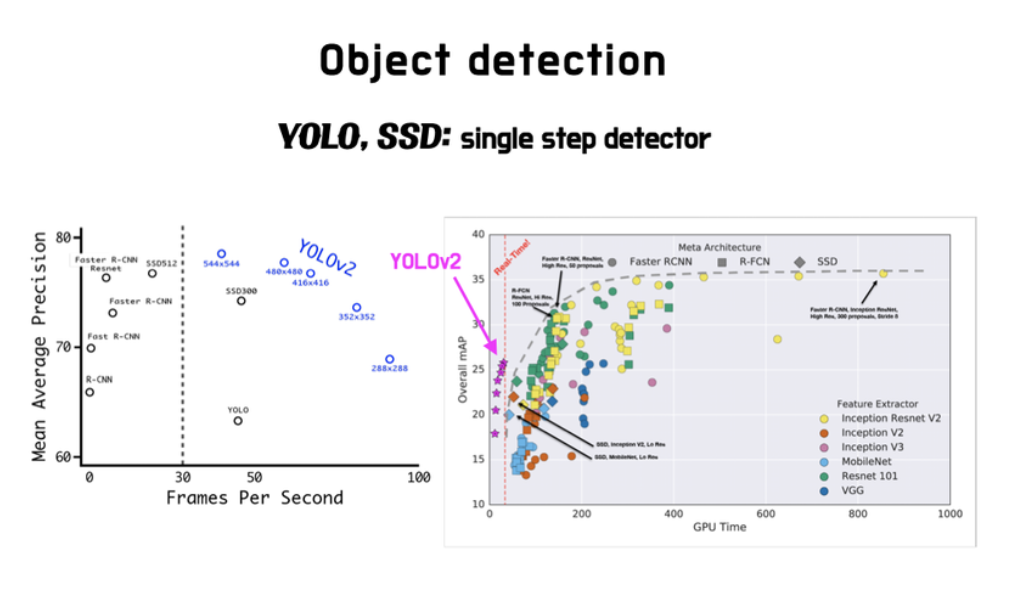

# 13-7. YOLO (5) YOLO v3


### RetinaNet의 도발

- RetinaNet의 성능이 YOLO v2보다 좋기도 했다.

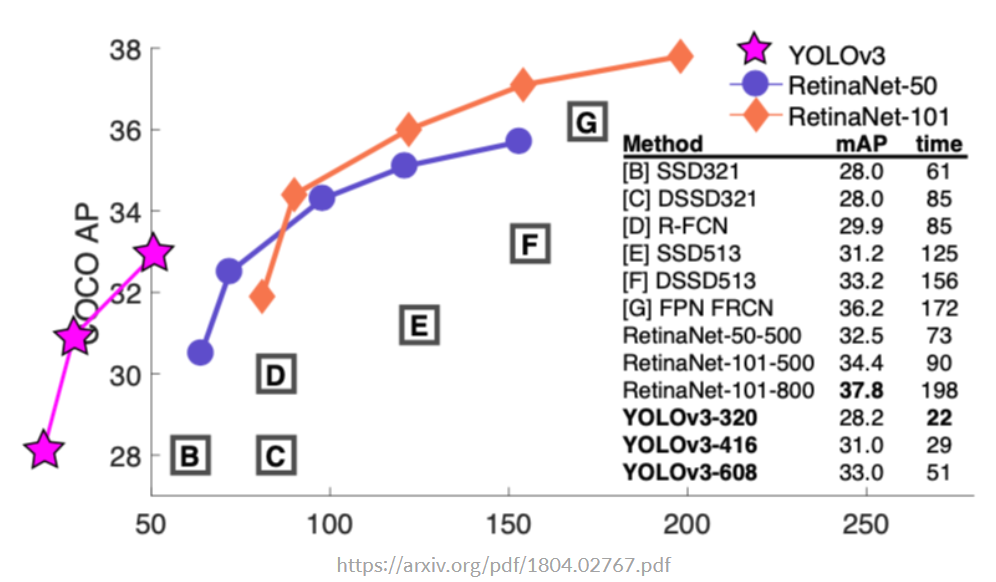

- RetinaNet의 그래프 보다 더 앞선 곳에서 성능이 뛰어나다.

### YOLO v3 원리
***************************

YOLO v3 논문 리뷰 : https://taeu.github.io/paper/deeplearning-paper-yolov3/


### YOLO v3 그 이후
****************************


- Redmon이 빠진 YOLO v4 : https://arxiv.org/pdf/2004.10934.pdf




# 13-8. SSD (1) SSD의 특징

### SSD : Single Shot MultiBox Detector


*************************************


> - SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 아래와 같은 몇 가지 테크닉을 제안
    - Image Pyramid
    - Pre-defined Anchor Box

### Image Pyramid

************************




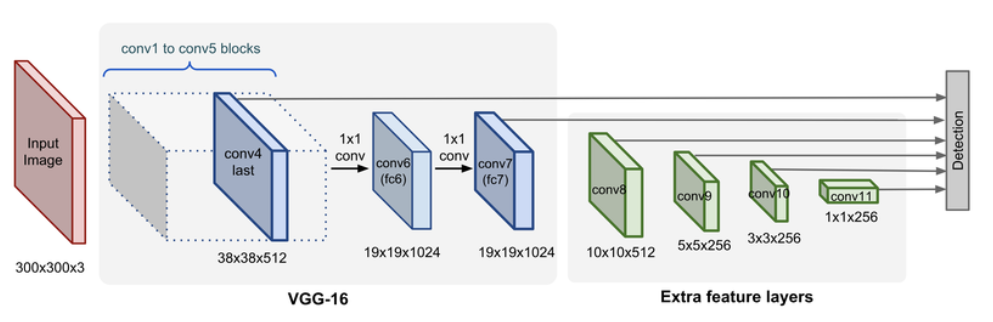

- Image Pyramid는 ImageNet으로 사전학습된 VGG16을 사용합니다. VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능합니다.

- YOLO에서 7x7 크기의 feature map 하나만을 사용했다면, SSD는 38x38, 19x19, 10x10, 5x5, 3x3 등의 다양한 크기의 feature map을 사용하였습니다. 
- 각 feature map은 YOLO의 관점에서 보면 원본 이미지에서 grid 크기를 다르게 하는 효과가 있었습니다. 
- 따라서 5 x 5 크기의 feature map에서 grid가 너무 커서 small object를 못찾는 문제를 38 x 38 크기의 feature map에서 찾을 수 있는 단서를 마련하였습니다.

> - Image feature pyramid의 단점은 무엇인가요?
    - YOLO와 비교하였을 때 최소 feature map의 개수만큼 계산량이 많다. 38 x 38 크기의 feature map은 box를 계산하기에는 충분히 깊지 않은 network일 수 있다.
    
### SSD의 Workflow
***************************

- YOLO v1의 두번째 단점은 box 정보 (x, y, w, h)를 예측하기 위한 **seed 정보가 없기 때문에 넓은 bbox 분포를 모두 학습할 수 없었다**는 점입니다. 이로 인한 성능 손실이 존재할 수 있었죠. 따라서 Faster R-CNN 등 에서 사용하는 anchor를 적용할 필요가 있었습니다.

- 만약 개가 등장하는 bounding box가 존재한다면, 그 bounding box만의 x, y, w, h 특성이 존재하기 때문에 **pre-defined된 box의 x, y, w, h를 refinement하는 layer를 추가**하는 것이 이득이었습니다. 이 anchor box를 SSD에서는 Default box라고 부릅니다.

### SSD의 framework
***********************

> (a)는 이미지 파일로, GT(Ground Truth) 데이터셋이고, (b)는 VGG Backbone에 가까운 fine-grained feature map입니다. 즉 8x8 grid에서 각각의 grid에 3개 anchor box를 적용할 수 있습니다. 고양이는 크기가 작기 때문에 (a)의 고양이는 8x8 feature map의 grid 중 1개의 anchor box로부터 학습될 수 있습니다.


💠 fine grained란,
"결이 거친, 조잡한"의 뜻을 가진 Coarse-grained와 반대되는 개념으로, 세밀하다는 뜻을 가지고 있습니다. 참고로 fine grained classification은 세밀하게 분류하는 것으로, 상대적으로 비슷한 특징을 가진 class를 분류하는 것입니다.

> (c)에서 개의 경우 크고 세로로 긴 경향을 보이기 때문에 receptive field가 넓은 4x4 feature map이 사용되었습니다.


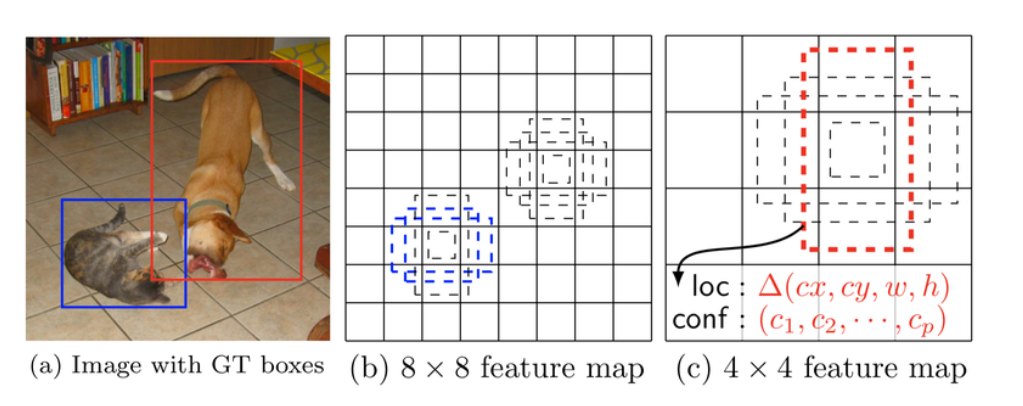


### Default box를 위한 scale

******************************



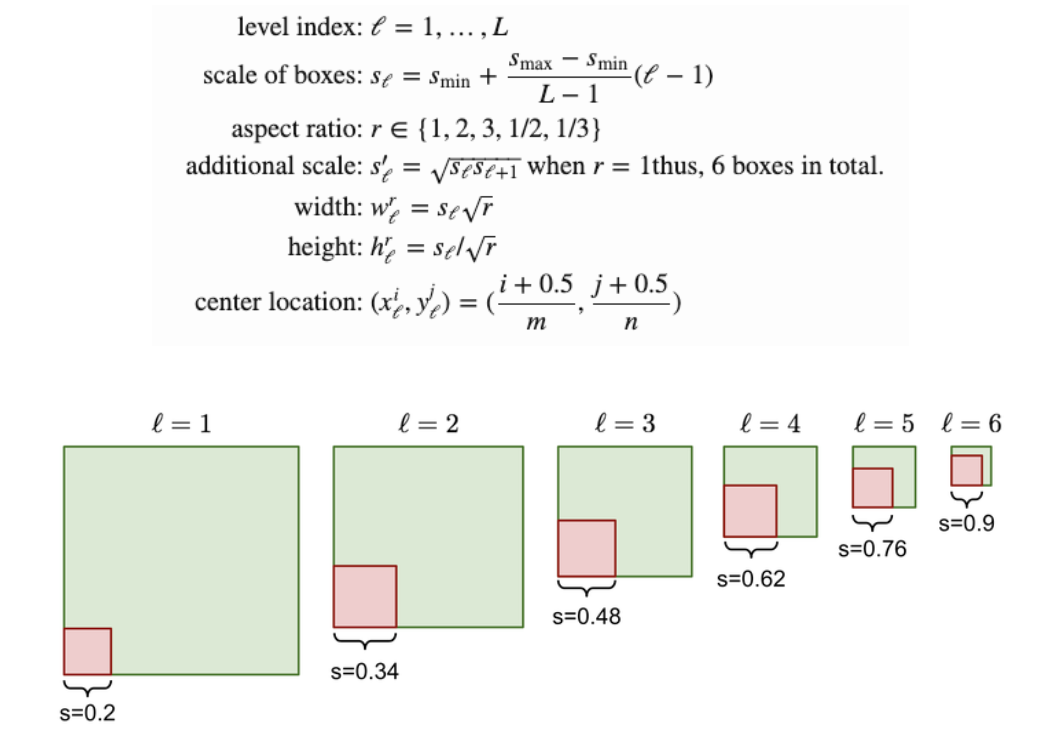

 $S_{min}$ 을 0.2, $S_{max}$를 0.9라고 하고, 위의 식에 넣으면 각 feature map당 서로 다른 6개의 s 값(scale 값)이 나옵니다. 여기서 aspect ratio를 {1, 2, 3, 1/2, 1/3}로 설정하고, Default box의 width는 $s_{l}x\sqrt {r}$ 이라고 합시다. r=1인 경우 $s_l = \sqrt {s_l \times s_{l+1}}$ 입니다.

> Default box의 cx, cy는 L번째 feature map의 크기를 나눠 사용합니다. 대략 예측되는 상자가 정사각형이나 가로로 조금 길쭉한 상자, 세로로 조금 길쭉한 상자이기 때문에 2:3으로 임의로 정해도 학습이 잘 되지만, 특이한 경우, 즉 가로 방향으로 걸어가는 지네와 같은 경우에 위의 비율로 정하면 threshold를 0.5로 했을 때 학습이 되지 않습니다. 따라서 학습할 이미지에 따라서 aspect ration를 조정해야 합니다. 임의로 정하는 것은 비효율적이므로 KNN과 같은 알고리즘을 활용하면 좋은 결과가 나올 것입니다.

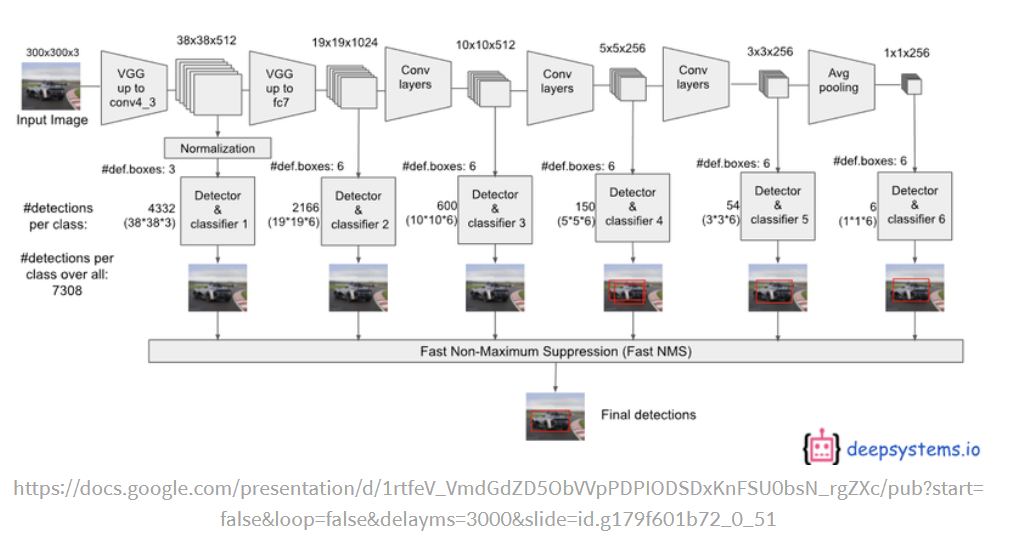

## 13-9. SSD (2) SSD의 Loss와 성능


### SSD Loss function
****************************

- SSD 논문 : https://arxiv.org/pdf/1512.02325.pdf

> Loss function의 종류
> Objective Loss Function 
> Localization Loss Function 
> Confidence Loss Function

- Objective Loss Function: Localization Loss(loc)와 Confidence Loss(conf)의 가중합(weighted sum)

$L(x, c, l, g) = \frac {1}{N} (L_{con f} (x, c) + \alpha L_{loc} (x, l, g))$

- Localization Loss Function: 예측된 박스 L과 Ground truth box gg 파라미터 사이의 Smooth L1 loss

$L_{\text {loc }}(x, l, g)=\sum_{i \in P_{os}}^{N} \sum_{m \in\{c x, c y, w, h\}} x_{i j}^{k} \operatorname{smooth}_{\mathrm{L} 1}\left(l_{i}^{m}-\hat{g}_{j}^{m}\right)$


$\quad \hat{g}_{j}^{c y}=\left(g_{j}^{c x}-d_{i}^{c x}\right) / d_{i}^{w}$
 
$\quad \hat{g}_{j}^{c y}=\left(g_{j}^{c y}-d_{i}^{c y}\right) / d_{i}^{h}$

$\hat{g}_{j}^{w}=\log \left(\frac{g_{j}^{w}}{d_{i}^{w}}\right)$

$\quad \hat{g}_{j}^{h}=\log \left(\frac{g_{j}^{h}}{d_{i}^{h}}\right)$


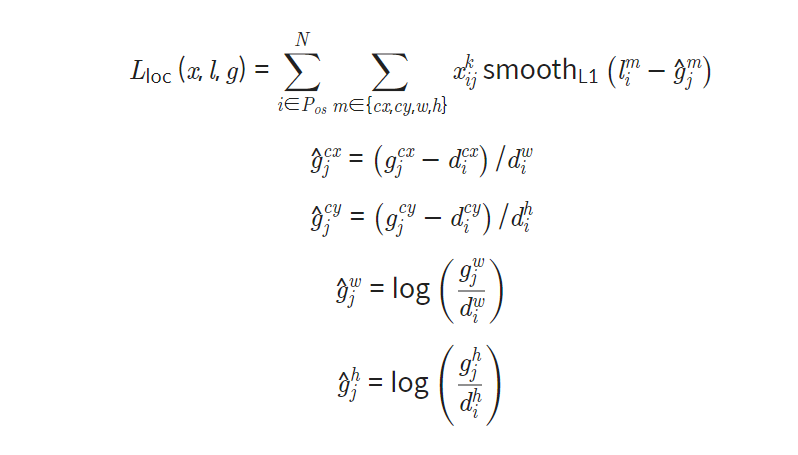

- Confidence Loss Function: 여러 class의 confidence c의 softmax loss


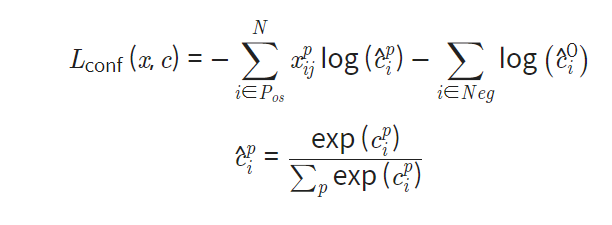



$\quad \hat{c}_{i}^{p}=\frac{\exp \left(c_{i}^{p}\right)}{\sum_{p} \exp \left(c_{i}^{p}\right)}$

- $x^{p}_{ij}$: category p에 대한 i번째 Default box와 j번째 Ground Truth box의 물체 인식 지표입니다. 0.5 이상이면 1, 미만이면 0으로 정의됩니다.

- N : 매치된 Default box의 개수, N이 0이면 loss는 0입니다.
- L : 예측된 상자(Predicted box)
- g : Ground Truth box
- d : Default bounding box
- cx, cy : Default bounding box의 x, y 좌표
- w, h : Default bounding box의 width, height
- $\alpha$ : 교차 검증으로 얻어진 값 ($\alpha$ = 1)

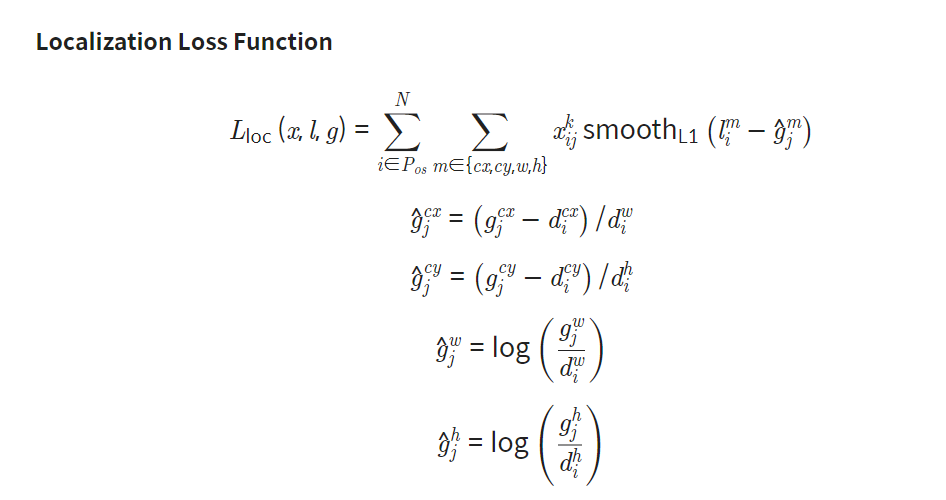

Localization Loss Function는 예측된 박스 ll과 Ground truth box gg 파라미터 사이의 Smooth L1 loss입니다. 예측해야 할 예측된 상자의 $L^{m}_{i}(cx, cy, w, h)$ 값들은 특이한 $\hat g$ 값을 예측합니다. 이때 $\hat g$의 cx, cy는 Default box의 cx, cy, w, h로 normalize됩니다. 이미 IoU가 0.5 이상된 부분에서만 고려하기 때문에 상대적으로 크지 않은 값들을 예측해야 하고, 비교적 빠르게 수렴할 것으로 예상할 수 있습니다.

초기 값은 Default box에서 시작하고 $\hat g$ 의 w, h도 마찬가지입니다. 예측된 L값들은 box를 표현할 때마다 default box의 offset 정보가 필요합니다.

### Confidence Loss Function

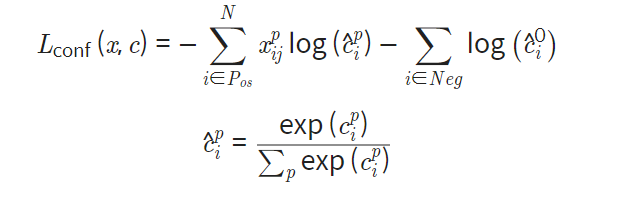

Confidence Loss Function는 매칭된(Positive) class에 대해서는 softmax를 취해줍니다. 매칭되지 않은(Negative) class를 예측하는 값은 $\hat c_{i}^{0}$ 이고 배경이면 1, 아니면 0의 값을 가집니다. 최종 predicted class score는 **예측할 class + 배경 class**를 나타내는 지표입니다.

### Hard negative mining

***************************************

- 대부분의 Default box가 배경이기 때문에 $x^p_{ij}$ 이 0인 경우가 많습니다. 따라서 마지막 class의 loss 부분에서는 positive:negative 비율을 1:3으로 정해 출력합니다. 즉 high confidence 순으로 정렬해 상위만 가져다 씁니다.

> SSD : https://seongkyun.github.io/papers/2019/07/01/SSD/

### SSD의 성능


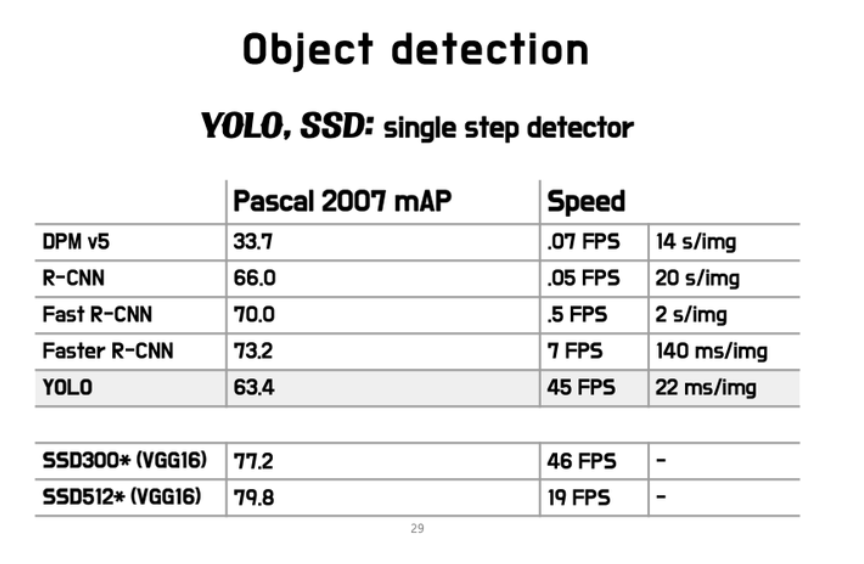

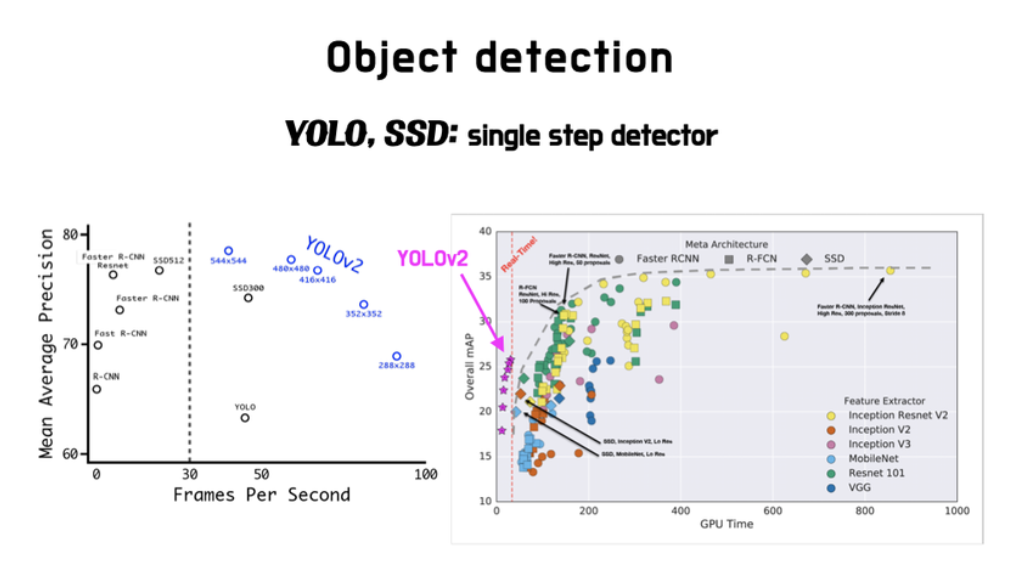

### FCOS

****************************
FCOS:Fully Convolutional One-Stage Object Detectionan는 기존의 anchor box기반에서 벗어나 pixelwise로 예측하는 FCOS를 제안했습니다. Anchor box를 사용하면서 생기는 부작용(예: 학습 계산량, 하이퍼파리미터에 민감한 성능 등)을 해결하면서도 좋은 성능을 보입니다. 

> 논문 : https://arxiv.org/pdf/1904.01355.pdf


> 논문 설명 : https://blog.naver.com/jinyuri303/221876480557

## 13-10. Face Detection을 위한 모델들




### S3FD

*********************************

> S3FD- Single Shot Scale-invariant Face Detector (간단히) : https://seongkyun.github.io/papers/2019/03/21/S3FD/


> S3FD: Single Shot Scale-invariant Face Detector : https://arxiv.org/abs/1708.05237







### DSFD
*******************************

> DSFD: Dual Shot Face Detector : 
https://arxiv.org/pdf/1810.10220.pdf

### RetinaFace
***********************

> RetinaFace: Single-stage Dense Face Localisation in the Wild : 
https://arxiv.org/pdf/1905.00641.pdf
